In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.activations import relu,tanh
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D,Dropout
from keras.utils import np_utils


In [9]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [63]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/CNN/fashion-mnist_test.csv')

In [64]:
x=data.values

In [65]:
X=x[:,1:]
y=x[:,0]
X=X/255.0
X=X.reshape(-1,28,28,1)
y=np_utils.to_categorical(y)
print(X.shape,y.shape)

(10000, 28, 28, 1) (10000, 10)


In [66]:
np_utils.to_categorical?

In [67]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 32)         

In [68]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [69]:
import tensorflow as tf
from tensorflow import keras

In [72]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>95):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks=myCallback()

In [73]:
hist=model.fit(X,y,epochs=20,batch_size=64,validation_split=0.20,callbacks=[callbacks])

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 266us/step - loss: 0.6845 - accuracy: 0.7385 - val_loss: 0.6224 - val_accuracy: 0.7890
Epoch 2/20
8000/8000 [==============================] - 2s 263us/step - loss: 0.5827 - accuracy: 0.7739 - val_loss: 0.5562 - val_accuracy: 0.8195
Epoch 3/20
8000/8000 [==============================] - 2s 260us/step - loss: 0.5264 - accuracy: 0.8015 - val_loss: 0.5187 - val_accuracy: 0.8305
Epoch 4/20
8000/8000 [==============================] - 2s 262us/step - loss: 0.4949 - accuracy: 0.8151 - val_loss: 0.5435 - val_accuracy: 0.8310
Epoch 5/20
8000/8000 [==============================] - 2s 265us/step - loss: 0.4631 - accuracy: 0.8253 - val_loss: 0.4488 - val_accuracy: 0.8490
Epoch 6/20
8000/8000 [==============================] - 2s 262us/step - loss: 0.4219 - accuracy: 0.8420 - val_loss: 0.4272 - val_accuracy: 0.8555
Epoch 7/20
8000/8000 [==============================] - 2s 259us/step - loss

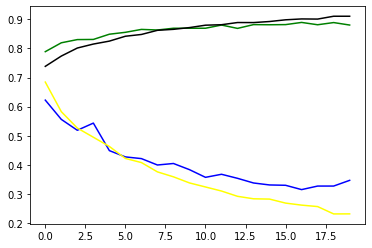

In [74]:
plt.plot(hist.history['val_loss'],color='blue')
plt.plot(hist.history['val_accuracy'],color='green')
plt.plot(hist.history['loss'],color='yellow')
plt.plot(hist.history['accuracy'],color='black')
plt.show()

In [75]:
from keras.models import load_model

In [76]:
model.save('cnn.h5')

In [77]:
loaded_model=load_model('./cnn.h5')

In [78]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 32)         

(1000, 10)
